In [127]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [128]:
from fastai.vision.all import *

In [129]:
set_seed(2)

In [130]:
path = Path("/home/kkalyan/tiny-imagenet-200/train/eye_train")

In [131]:
path.ls()

(#4) [Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/D'),Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/HE'),Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/models'),Path('/home/kkalyan/tiny-imagenet-200/train/eye_train/.ipynb_checkpoints')]

In [132]:
path

Path('/home/kkalyan/tiny-imagenet-200/train/eye_train')

In [133]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.10,
                                   item_tfms=Resize(224),
                                   bs=64, num_workers=32)

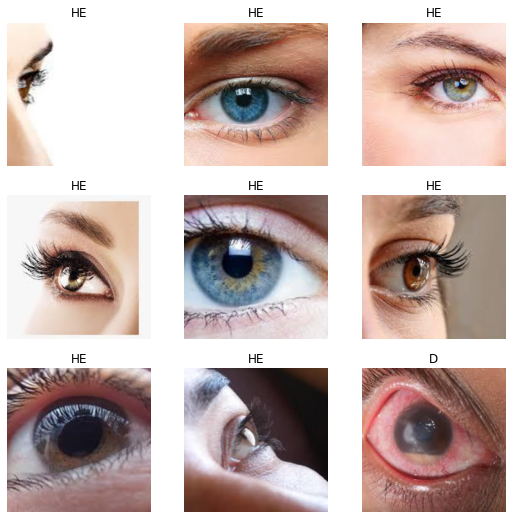

In [134]:
dls.show_batch()

In [135]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy]).to_fp16()
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.640701,3.639746,0.700000,0.300000,00:01


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.015527,2.869215,0.700000,0.300000,00:01


SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=7.585775892948732e-05)

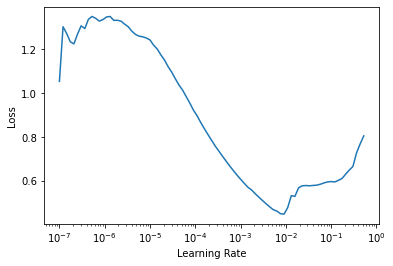

In [136]:
learn.lr_find()

In [137]:
learn.fit_one_cycle(10, lr_max=1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.582680,2.175300,0.800000,0.200000,00:01
1,1.343751,0.486053,0.100000,0.900000,00:01
2,1.003518,0.203502,0.100000,0.900000,00:01
3,0.814873,0.006189,0.000000,1.000000,00:01
4,0.684036,0.290044,0.100000,0.900000,00:01
5,0.582282,0.624888,0.200000,0.800000,00:02
6,0.500268,0.905872,0.200000,0.800000,00:01
7,0.435573,1.078841,0.300000,0.700000,00:01
8,0.383332,0.922251,0.300000,0.700000,00:02
9,0.342148,0.715747,0.200000,0.800000,00:01


In [138]:
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.003087,0.541255,0.200000,0.800000,00:01
1,0.004900,0.601873,0.200000,0.800000,00:01
2,0.003665,0.430957,0.100000,0.900000,00:01
3,0.003172,0.358659,0.100000,0.900000,00:01
4,0.002852,0.222908,0.100000,0.900000,00:01
5,0.002417,0.135459,0.100000,0.900000,00:01


In [139]:
interp = ClassificationInterpretation.from_learner(learn)

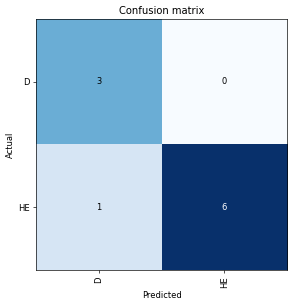

In [140]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [141]:
interp.top_losses

<bound method Interpretation.top_losses of <fastai.interpret.ClassificationInterpretation object at 0x7f3a495d9190>>

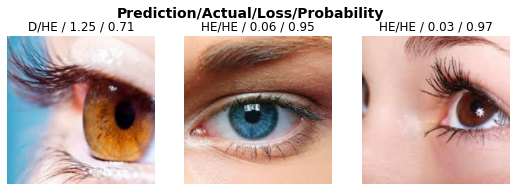

In [142]:
interp.plot_top_losses(3)

In [143]:
from ipywidgets import *
uploader = widgets.FileUpload()

In [148]:
uploader

FileUpload(value={}, description='Upload')

In [152]:
uploader.data[0]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x00\xa8\x08\x02\x00\x00\x00\xd5IDX\x00\x00\xad#IDATx\x9c\xdc\xfdY\x8f,[\x96&\x86\xad\xb5\xf6df>\xc4p\xe2\x8c\xf7ffe\x15\x8b\xd5\xdd\x84\xd8#\xa4\xff\xa0WA@\x03\xd2\xbf\xd0\x1f\xd0/\x11H=\xb4@\x08\x04\x04\x02\x92(\x82\x10$\xf1\xa1\x01\xa1\xa1\xa6\xc4\xeejVuge\xd6\xcd;\x9c!"<|\xb0a\x0fk-=lw\x0f?\x11\'N\xde\x9b\x99\x95\x99U\xfb\x1e\xf8\xb5\xb0\xb007\xdb{\x7fk\x1e\xf0?\xfb\xdf\xfc\xcf\x89\xc8\x18\xe3\x9c\x0b\xd6Yk\xad\xb5\x86\xc8{_J\xc99\xa3("\x8aH\xfd\x11RQU\x11af\x11\x11\x11U\x05\x80\x10\x02"\x12\x91s\xceZ\xab\xaa1\xc6\x94R\x9c\xd8Z\x1bB\xf0\xde\x1bc\x00\xa0\xfey\xd34\x00\x00\x00\x88x\xfc\x04\x00\x92\x0c\x9f\x1a\xc7\x0b~\xe3a\x7f\xd0\xd5\xf5\xed\x1e\x8f\xa7\x9eG\xc8\x9c^p\xbc\xecx\x9fzp\x7f[\xd3\x9c\x9cdUUU@a.\x00\x00(\x87\xfb\xec\xaf\x97\x98\x1f\xdf\r\x00f\xb3\x99~j\x88\xc6\xd3\xc78\x1e\x88\xc8\'\x9f\x87\xc0\x1c\xcf\x9c\xfe\xea\xa9\xf75\xba\x7f\xcd:>se\x1dI\xf6w#\xad\xcfc\x00\x00\x15J)\xf5\xdb\x1f<\'9\xfe\xfc\xf3\x7f\x9f/\xfd\xc

In [153]:
img = PILImage.create(uploader.data[0])

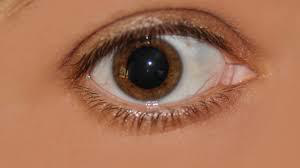

In [154]:
img

In [155]:
learn.predict(img)

('HE', tensor(1), tensor([0.0401, 0.9599]))